# Machine Learning Lifecycle model with MLflow tracking

- Hands-on tutorial

- The scope for this tutorial is from **Plan to Model Evaluation**

<img src="https://media.datacamp.com/legacy/image/upload/v1664812812/Machine_Learning_Lifecycle_2ffa5897a7.png" width="600">

**Resources:**

For more information refer to [The Machine Learning Life Cycle Explained](https://www.datacamp.com/blog/machine-learning-lifecycle-explained) article.

# 0. Prerequisites

This sample tutorial is executed in Google Colab Notebook, a web interface which runs in a Cloud environment. Alternatively, you can also use Jupyter Notebook to run in your desktop machine. For more information refer to installation and setup instructions in [Jupyter Notebook](https://jupyter.org/) website.

* Google Colab hosts Numpy, Pandas, Scikit learn, Matplotlib and seaborn libraries. You can import these modules directly in your notebook.

* MLflow is not a pre-installed library and so, it needs to be installed as shown

In [2]:
# MLflow Installation
!pip install mlflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.3 MB/s eta 0:00:00


In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import xgboost as xgb
import mlflow
import mlflow.sklearn

# 1. Plan

#### **Feasibility Study**

  1. **Availability of the data:**
      - Check for available datasets that can be used for the project and if it is trainable
  1. **Applicability:**
      - Check if the dataset will help solve the problem statement
  1. **Legal constraints:**
      - Check if the data and models meets legal requirements
  1. **Scalabilty:**
      - Check if both model and data can be scalable
  1. **Explainability:**
      - Check if the models have explainabilty
  1. **Availability of resources:**
      - Check if you have computing resources



# 1A. Problem Statement

- **Identify the flower type with the provided flower measurments.**

- **Use Classfication model to identify the solution**

# 2. Data Preparation/ Exploratory Data Analysis (EDA)

- IRIS dataset imported from Scikit Learn library
- The IRIS flower dataset consists of physical measurements of sepals and petals in `cm` for the three flowers **setosa, versicolor, virginica**.
- It has a total of 150 samples with 50 samples per species.
- IRIS is stored as a multi-dimensional array or 4-dimensional array or 4D dataset.

In [4]:
# Import iris dataset
from sklearn.datasets import load_iris
iris=load_iris()


In [5]:
#Exploring the dataset to check which part of the data can be converted into a table or Dataframe.
print("Column names:", iris.feature_names)
print("Rows,Columns:",iris.data.shape)

Column names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Rows,Columns: (150, 4)


In [6]:
print("Data:",iris.data[:10]) #first 10 rows of data with the flower measurements
print("Target names/flower identifier names/metadata:", iris.target_names) #Metadata: names of the flowers
print("Target/Flower measurements identifier", iris.target) # 0:setosa, 1:versicolor, 2:virginica

Data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Target names/flower identifier names/metadata: ['setosa' 'versicolor' 'virginica']
Target/Flower measurements identifier [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
print(iris.target_names)
print(iris.target)
print(iris.target.shape) #The identifier are stored in a separate 1 dimensional array

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)


In [8]:
# @title
iris = load_iris()

# Create a mapping table
df_mapping = pd.DataFrame({
    'Target Value': range(len(iris.target_names)),
    'Species Name': iris.target_names
})

print(df_mapping.to_string(index=False))


 Target Value Species Name
            0       setosa
            1   versicolor
            2    virginica


In [9]:
# @title
iris['target'][:]
print(iris.target_names)


['setosa' 'versicolor' 'virginica']


In [10]:
#create dataframe with Pandas & Numpy
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [11]:
df.sample(10) # a random sample of 10 rows in the dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
94,5.6,2.7,4.2,1.3,1.0
148,6.2,3.4,5.4,2.3,2.0
10,5.4,3.7,1.5,0.2,0.0
59,5.2,2.7,3.9,1.4,1.0
149,5.9,3.0,5.1,1.8,2.0
99,5.7,2.8,4.1,1.3,1.0
101,5.8,2.7,5.1,1.9,2.0
128,6.4,2.8,5.6,2.1,2.0
145,6.7,3.0,5.2,2.3,2.0
84,5.4,3.0,4.5,1.5,1.0


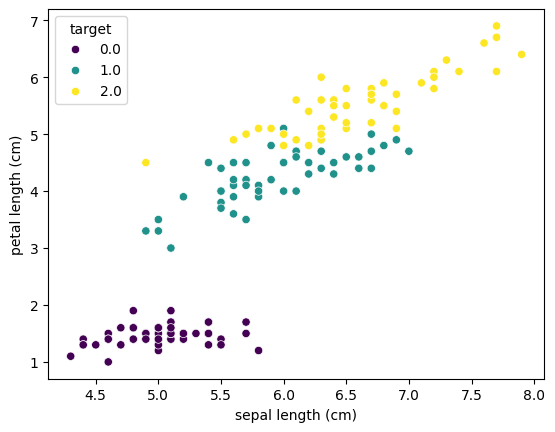

In [12]:
#Visualizing the data to identify the flower types based on sepal length and petal length
sns.scatterplot(data=df, x=df['sepal length (cm)'], y=df['petal length (cm)'], hue='target',palette='viridis')
#plt.legend(labels=['setosa' 'versicolor' 'virginica'], title='Iris Species')
plt.show()

# 3. Model Engineering

- Train and Test the dataset

- A k-NN (k Nearest neighbor) classification model is used for identifying the flower type

- [k-NN model](https://www.geeksforgeeks.org/machine-learning/k-nearest-neighbours/) uses the Euclidean distance(straight line) concept and similarity(Minkowski Distance) between existing data point and the new data point to classify or predict the flower type(target)

In [13]:
# Preparing the data for training
X= df.drop('target', axis=1)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
y=df['target']
y

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


In [15]:
# Split the dataset into 80% training and 20% testing
# random_state ensure the same or identical data is used from the dataset each time it goes through training
# stratify is used to prevent bad random splitting. it helps select equal number of species(flower type) each time
# it does a train, test split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [16]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


# MLflow

Mlflow is a tool for managing Machine Learning Lifecycle model. It tracks model iterations as experiments, manages your ML models, tracks models parameters and provides visualized metrics. For detailed information refer to the [MLflow documentation]((https://mlflow.org/docs/latest/ml/).

MLflow can be integrated in your models in two ways:
1. **MLflow UI**
2. **Implementing MLflow directly in your code**

The example below shows you how to incorporate MLflow in your code.

### Step 1: Installation

Use the `pip` command to install mlfow and import the mlflow library

**MLflow Installation**

!pip install mlflow --quiet\
import mlflow\
import mlflow.sklearn

### Step 2. **MLflow** instantiation

- Instantiate MLflow to start model execution(training) tracking. The below code starts an instance for tracking the ML model.
- You can list all the parameters that you need to track using the `log_param` function. The example ML model used is k-NN(K nearest neighbors)
- The model parameter that is tracked in the `k-value` which is defined as `k_neighbors`


In [102]:
#Setting hyper parameter for k-NN mode. k-NN model looks for 4 closest data points(neigbors) to decide on the
# classification of the new point
n_neighbors=20
with mlflow.start_run():
  mlflow.log_param('k_neighbors',n_neighbors)

### Step 3. Start logging

- The code below starts recording the model trainings results such as parameters, artifacts and metrics

- Each training cycle is logged in as experiments and has a specific ID

In [96]:
mlflow.sklearn.autolog()

### Step 4. Load the model

- The kNN Classifier model is loaded. kNN is a classification model which identifies and categorizes data in the respective class.
  - IRIS is Scikit learn's multiclass flower dataset used for Classification problems in machine learning.


In [103]:
knn=neighbors.KNeighborsClassifier(n_neighbors)
knn

KNeighborsClassifier(n_neighbors=20)

### Step 5. Train the model

- The model is trained using the IRIS dataset
- You should define the list of parameters required for the model in order execute the ML model. In the below code, the kNN model has 1 mandatory parameter `k_neighbors`
- The `k_neighbors` parameter can be tuned to improve training score and accuracy metrics score
- Each time the parameter is tuned `mlflow` logs this information

In [104]:
knn.fit(X_train,y_train)

2026/02/05 07:09:17 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '409cc8f7ea864111984d70efd7973467', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2026/02/05 07:09:17 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.12/dist-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format."


KNeighborsClassifier(n_neighbors=20)

### Step 6. Predict the label or class

 - The kNN model does an approximate guess for classifying the flower species

In [99]:
y_predict=knn.predict(X_test)
y_predict

array([0., 2., 1., 1., 0., 1., 0., 0., 2., 1., 2., 2., 2., 1., 0., 0., 0.,
       1., 1., 1., 0., 2., 1., 2., 2., 2., 1., 0., 2., 0.])

# Model Evaluation

- This phase checks how the model has performed and how accurate are the predictions.

- MLflow has built-in evaluation metrics such as accuracy, loss and many more.

- You can also use the MLflow UI for graphical visualization of parameters, artifacts and metrics. Refer to the [installation guide for MLflow UI](https://mlflow.org/docs/latest/ml/getting-started/running-notebooks/)

In [89]:
# manual accuracy score calculation
accuracy=knn.score(X_test,y_test)
accuracy

0.9333333333333333

### Step 7: Logging metrics

- You can also manually log your required metrics using the below code

In [90]:
mlflow.log_metric("accuracy",accuracy)

### Step 8: Retrive log data

- All the logs are stored in a temp file and needs to be retreived
- The `search_runs` function retreives the log which contains all the tracked experiments, parameters, artificats and metrics

In [105]:
runs=mlflow.search_runs()

### Step 8: View the log

- You can use pandas dataframe to structure, organize and manipulate the data in a table format.

In [106]:
knn_log=pd.DataFrame(data=runs)
knn_log

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.training_roc_auc,metrics.training_recall_score,metrics.training_precision_score,metrics.training_log_loss,...,params.eta,params.custom_metric,params.early_stopping_rounds,tags.mlflow.autologging,tags.mlflow.user,tags.mlflow.source.type,tags.estimator_name,tags.mlflow.source.name,tags.estimator_class,tags.mlflow.runName
0,409cc8f7ea864111984d70efd7973467,0,FINISHED,/content/mlruns/0/409cc8f7ea864111984d70efd797...,2026-02-05 07:09:17.789000+00:00,2026-02-05 07:09:23.334000+00:00,0.997396,0.983333,0.983333,0.104154,...,None,None,None,sklearn,root,NOTEBOOK,KNeighborsClassifier,fileId=1hAyu5M2t1rNaUFZ65ZwkGnCg9QKMowKR,sklearn.neighbors._classification.KNeighborsCl...,useful-lark-905
1,e0c6cfb92d6943849b80832e8a4f79a1,0,FINISHED,/content/mlruns/0/e0c6cfb92d6943849b80832e8a4f...,2026-02-05 07:07:42.466000+00:00,2026-02-05 07:07:42.495000+00:00,NaN,NaN,NaN,NaN,...,None,None,None,None,root,NOTEBOOK,None,fileId=1hAyu5M2t1rNaUFZ65ZwkGnCg9QKMowKR,None,monumental-shrike-49
2,02519f9fea6b47ac88f9bc7b7766a52b,0,FINISHED,/content/mlruns/0/02519f9fea6b47ac88f9bc7b7766...,2026-02-05 07:07:27.869000+00:00,2026-02-05 07:07:27.910000+00:00,NaN,NaN,NaN,NaN,...,None,None,None,None,root,NOTEBOOK,None,fileId=1hAyu5M2t1rNaUFZ65ZwkGnCg9QKMowKR,None,resilient-grouse-311
3,cf49c315cedb49c793a80f951a8c842f,0,FINISHED,/content/mlruns/0/cf49c315cedb49c793a80f951a8c...,2026-02-05 06:42:34.101000+00:00,2026-02-05 06:42:39.549000+00:00,0.997396,0.983333,0.983333,0.104154,...,None,None,None,sklearn,root,NOTEBOOK,KNeighborsClassifier,fileId=1hAyu5M2t1rNaUFZ65ZwkGnCg9QKMowKR,sklearn.neighbors._classification.KNeighborsCl...,placid-hare-712
4,e96a85e3994a48f49217033f11b06547,0,FINISHED,/content/mlruns/0/e96a85e3994a48f49217033f11b0...,2026-02-05 06:39:57.242000+00:00,2026-02-05 06:39:57.277000+00:00,NaN,NaN,NaN,NaN,...,None,None,None,None,root,NOTEBOOK,None,fileId=1hAyu5M2t1rNaUFZ65ZwkGnCg9QKMowKR,None,monumental-worm-406
5,01c41f694c35419b86f40e62640dc1c0,0,FINISHED,/content/mlruns/0/01c41f694c35419b86f40e62640d...,2026-02-05 06:27:47.554000+00:00,2026-02-05 06:27:52.884000+00:00,NaN,NaN,NaN,NaN,...,None,None,None,None,root,NOTEBOOK,None,fileId=1hAyu5M2t1rNaUFZ65ZwkGnCg9QKMowKR,None,judicious-fish-347
6,6f00907538254b76a34a0ebe4f13e4ed,0,FINISHED,/content/mlruns/0/6f00907538254b76a34a0ebe4f13...,2026-02-05 06:27:42.332000+00:00,2026-02-05 06:27:47.428000+00:00,0.997396,0.983333,0.983333,0.104154,...,None,None,None,sklearn,root,NOTEBOOK,KNeighborsClassifier,fileId=1hAyu5M2t1rNaUFZ65ZwkGnCg9QKMowKR,sklearn.neighbors._classification.KNeighborsCl...,rogue-snipe-605
7,92d437d5e36f4246b55c7ab4f3d56384,0,FINISHED,/content/mlruns/0/92d437d5e36f4246b55c7ab4f3d5...,2026-02-05 06:27:38.796000+00:00,2026-02-05 06:27:38.835000+00:00,NaN,NaN,NaN,NaN,...,None,None,None,None,root,NOTEBOOK,None,fileId=1hAyu5M2t1rNaUFZ65ZwkGnCg9QKMowKR,None,persistent-gnu-78
8,3d71612726be4d3e909405d569d68fd9,0,FINISHED,/content/mlruns/0/3d71612726be4d3e909405d569d6...,2026-02-05 06:26:55.171000+00:00,2026-02-05 06:27:00.279000+00:00,NaN,NaN,NaN,NaN,...,None,None,None,None,root,NOTEBOOK,None,fileId=1hAyu5M2t1rNaUFZ65ZwkGnCg9QKMowKR,None,welcoming-wasp-989
9,e7a2022fcb3d43cdb992e3a6d87e3643,0,FINISHED,/content/mlruns/0/e7a2022fcb3d43cdb992e3a6d87e...,2026-02-05 06:26:50.409000+00:00,2026-02-05 06:26:55.066000+00:00,0.997396,0.975000,0.975193,0.072238,...,None,None,None,sklearn,root,NOTEBOOK,KNeighborsClassifier,fileId=1hAyu5M2t1rNaUFZ65ZwkGnCg9QKMowKR,sklearn.neighbors._classification.KNeighborsCl...,magnificent-duck-222


### Step 8A: View your required metrics

- The example below extracts only the k-value, training metrics score and accuracy score
- Based on the results you can determine the best model that outputs highest accuracy in the class predictions
- The model is overfitting. The reason is that only one training dataset was used against the different k value. As the k-value gets higher the accuracy is going higher. In short, the model memorized the training dataset too well and can't handle new data.
- To determine if the model is performing well you should evaluate using different training datasets and multiple k-values

In [93]:
knn_log[['params.n_neighbors','metrics.training_score','metrics.training_accuracy_score']]

,params.n_neighbors,metrics.training_score,metrics.training_accuracy_score
0,None,NaN,NaN
1,20,0.983333,0.983333
2,None,NaN,NaN
3,None,NaN,NaN
4,7,0.975000,0.975000
5,None,NaN,NaN
6,None,NaN,NaN
7,8,0.975000,0.975000
8,None,NaN,NaN
9,None,NaN,NaN


### Step 9: Stop the mlflow instance

- Use the `end_run` function to terminate the instance

In [94]:
mlflow.end_run()

# xGBoost model


In [28]:
# @title
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [29]:
# @title
mlflow.xgboost.autolog()

In [30]:
# @title
with mlflow.start_run():
  params = {
      "objective": "multi:softmax", # Multiclass classification
      "num_class": 3,               # Three Iris species
      "max_depth": 4,
      "eta": 0.3,
    }

In [31]:
# @title
model = xgb.train(params, dtrain, num_boost_round=10)

2026/02/05 06:08:42 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c18e774c7d2e449b8d3dc740bff14339', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow
2026/02/05 06:08:42 WARNING mlflow.xgboost: Failed to infer model signature: could not sample data to infer model signature: please ensure that autologging is enabled before constructing the dataset.
2026/02/05 06:08:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [32]:
# @title
y_pred = model.predict(dtest)

In [33]:
# @title
runs_xgboost=mlflow.search_runs()

In [34]:
# @title
xgboost_log=pd.DataFrame(data=runs_xgboost)
xgboost_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 40 columns):
 #   Column                                     Non-Null Count  Dtype              
---  ------                                     --------------  -----              
 0   run_id                                     5 non-null      object             
 1   experiment_id                              5 non-null      object             
 2   status                                     5 non-null      object             
 3   artifact_uri                               5 non-null      object             
 4   start_time                                 5 non-null      datetime64[ns, UTC]
 5   end_time                                   5 non-null      datetime64[ns, UTC]
 6   metrics.accuracy                           1 non-null      float64            
 7   metrics.training_roc_auc                   1 non-null      float64            
 8   metrics.training_recall_score              1 non-null 

In [35]:
# @title
xgboost_log

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.accuracy,metrics.training_roc_auc,metrics.training_recall_score,metrics.training_precision_score,...,params.n_jobs,params.weights,params.k_neighbors,tags.mlflow.autologging,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.runName,tags.estimator_class,tags.estimator_name
0,c18e774c7d2e449b8d3dc740bff14339,0,FINISHED,/content/mlruns/0/c18e774c7d2e449b8d3dc740bff1...,2026-02-05 06:08:42.877000+00:00,2026-02-05 06:08:49.386000+00:00,NaN,NaN,NaN,NaN,...,None,None,None,xgboost,root,NOTEBOOK,fileId=1hAyu5M2t1rNaUFZ65ZwkGnCg9QKMowKR,rumbling-whale-287,None,None
1,25a42cd0bd6349e2a0ae3c48e03bc4b1,0,FINISHED,/content/mlruns/0/25a42cd0bd6349e2a0ae3c48e03b...,2026-02-05 06:08:42.838000+00:00,2026-02-05 06:08:42.856000+00:00,NaN,NaN,NaN,NaN,...,None,None,None,None,root,NOTEBOOK,fileId=1hAyu5M2t1rNaUFZ65ZwkGnCg9QKMowKR,mercurial-bee-709,None,None
2,0a16294e304c4c4099c4fc04bba45b9e,0,FINISHED,/content/mlruns/0/0a16294e304c4c4099c4fc04bba4...,2026-02-05 06:08:42.649000+00:00,2026-02-05 06:08:42.754000+00:00,1.0,NaN,NaN,NaN,...,None,None,None,None,root,NOTEBOOK,fileId=1hAyu5M2t1rNaUFZ65ZwkGnCg9QKMowKR,overjoyed-panda-303,None,None
3,ca69a2abfa1d43bb89fca41b25e4abd5,0,FINISHED,/content/mlruns/0/ca69a2abfa1d43bb89fca41b25e4...,2026-02-05 06:08:30.868000+00:00,2026-02-05 06:08:42.539000+00:00,NaN,0.997396,0.958333,0.958516,...,None,uniform,None,sklearn,root,NOTEBOOK,fileId=1hAyu5M2t1rNaUFZ65ZwkGnCg9QKMowKR,sassy-mare-935,sklearn.neighbors._classification.KNeighborsCl...,KNeighborsClassifier
4,8e34999c6a2248d481cc2e9f10143649,0,FINISHED,/content/mlruns/0/8e34999c6a2248d481cc2e9f1014...,2026-02-05 06:08:28.543000+00:00,2026-02-05 06:08:28.657000+00:00,NaN,NaN,NaN,NaN,...,None,None,4,None,root,NOTEBOOK,fileId=1hAyu5M2t1rNaUFZ65ZwkGnCg9QKMowKR,indecisive-gnat-632,None,None


In [36]:
# @title
mlflow.end_run()

In [37]:
# @title
